# Shoe Price Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
dataframe = pd.read_csv("/work/part 5/Shoe prices.csv")
dataframe['Size'] = dataframe['Size'].str.replace(r'[^\d.]+', '')
dataframe['Size'] = dataframe['Size'].astype(float)
dataframe = dataframe.rename(columns={'Price (USD)': 'Price'})
dataframe['Price'] = dataframe['Price'].str.replace(r'[^\d.]+', '')
dataframe['Price'] = dataframe['Price'].astype(float)
dataframe['Gender'] = dataframe['Gender'].replace(to_replace='Men', value='1')
dataframe['Gender'] = dataframe['Gender'].replace(to_replace='Women', value='0')
dataframe['Gender'] = dataframe['Gender'].astype(int)
dataframe = dataframe.drop(columns='Material')
dataframe = dataframe.drop(columns='Model')
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brand   1006 non-null   object 
 1   Type    1006 non-null   object 
 2   Gender  1006 non-null   int64  
 3   Size    1006 non-null   float64
 4   Color   1006 non-null   object 
 5   Price   1006 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.3+ KB
/tmp/ipykernel_247/1219816943.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['Size'] = dataframe['Size'].str.replace(r'[^\d.]+', '')
/tmp/ipykernel_247/1219816943.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['Price'] = dataframe['Price'].str.replace(r'[^\d.]+', '')


## Data Analysis

In [3]:
print(dataframe.shape)
dataframe.head()

(1006, 6)


,Brand,Type,Gender,Size,Color,Price
0,Nike,Basketball,1,10.0,Red/Black,170.0
1,Adidas,Running,1,9.5,Black,180.0
2,Reebok,Casual,1,11.0,White,75.0
3,Converse,Casual,0,8.0,Navy,55.0
4,Puma,Lifestyle,0,7.5,Pink,80.0


In [4]:
#print(f'Every Brand : {dataframe.Brand.unique()}')
df = pd.DataFrame()

for x in dataframe.Brand.unique(): df[x] = [dataframe.loc[dataframe['Brand'] == x].shape[0]]
df.head()

,Nike,Adidas,Reebok,Converse,Puma,Vans,New Balance,Asics,Fila,Skechers
0,118,100,100,100,100,100,100,100,99,89


In [5]:
print(f'Every Gender : {dataframe.Gender.unique()}')
print(f'Number of Men: {dataframe.loc[dataframe.Gender == 0].shape[0]}')
print(f'Number of Woman: {dataframe.loc[dataframe.Gender == 1].shape[0]}')


Every Gender : [1 0]
Number of Men: 471
Number of Woman: 535


In [6]:
print(f'Every Color : {dataframe.Color.unique()}')

Every Color : ['Red/Black' 'Black' 'White' 'Navy' 'Pink' 'Black/White' 'Grey' 'Blue'
 'White/Green' 'Yellow' 'Purple' 'Black/Pink' 'Blue/Orange' 'Black/Red'
 'Checkered' 'Black/Grey' 'White/Red' 'Beige' 'Orange' 'White/Navy'
 'White/Blue' 'Red' 'Green' 'Red/White' 'Black/Yellow' 'White/Pink'
 'Blue/White' 'White/Grey' 'Cream' 'White/Navy/Red' 'Yellow/Black'
 'Navy/White' 'Grey/Pink' 'Grey/Green' 'White/Red/Navy' 'White/Black'
 'Grey/Purple' 'Black/Green' 'Black/Blue' 'Pink/White' 'Blue/Green'
 'Zebra' 'Khaki' 'Checkerboard' 'Grey/Yellow' 'Ivory' 'Egret'
 'Grey/Orange' 'Grey/Black' 'Green/Orange' 'Black/Gold'
 'Black/White Checkerboard' 'Cream White' 'Green/White'
 'Checkerboard Black/White' 'Blue/Black' 'Cloud White' 'Grey/White'
 'Navy/Red' 'Multi-color' 'Pink/Black' 'Sunflower' 'Blue/Red'
 'Silver/White' 'Black/Gum' 'Egret/Black' 'True White' 'Blue/Pink'
 'Black/Gold/Red' 'Natural' 'Burgundy' 'Charcoal' 'Cinder' 'Blue/Yellow'
 'White/Red/Blue' 'Silver' 'White/Gold' 'Brown' 'Green/Bla

In [7]:
dataframe["Color"] = dataframe["Color"].str.split("/", expand=True)[0]
print(f'Every Color : {dataframe.Color.unique()}')

Every Color : ['Red' 'Black' 'White' 'Navy' 'Pink' 'Grey' 'Blue' 'Yellow' 'Purple'
 'Checkered' 'Beige' 'Orange' 'Green' 'Cream' 'Zebra' 'Khaki'
 'Checkerboard' 'Ivory' 'Egret' 'Cream White' 'Checkerboard Black'
 'Cloud White' 'Multi-color' 'Sunflower' 'Silver' 'True White' 'Natural'
 'Burgundy' 'Charcoal' 'Cinder' 'Brown' 'Clay Brown' 'Natural Ivory'
 'Collegiate Navy']


In [8]:
#print(f'Every Type : {dataframe.Type.unique()}')
df = pd.DataFrame()
for x in dataframe.Type.unique(): df[x] = [dataframe.loc[dataframe['Type'] == x].shape[0]]
df.head()

,Basketball,Running,Casual,Lifestyle,Skate,Fashion,Walking,Cross-training,Slides,Crossfit,Training,Trail,Trail Running,Weightlifting,CrossFit,Hiking,Racing,Retro
0,52,332,243,76,100,86,46,1,3,11,34,6,3,4,3,2,1,3


Min : 6.0
Max : 12.0
Median : 9.0
Mean : 8.912027833001988
Std : 1.449297123594187


<AxesSubplot: ylabel='Size'>

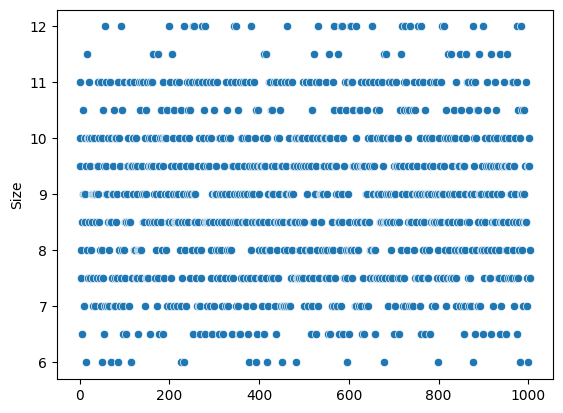

In [9]:
print(f'Min : {dataframe.Size.min()}')
print(f'Max : {dataframe.Size.max()}')
print(f'Median : {dataframe.Size.median()}')
print(f'Mean : {dataframe.Size.mean()}')
print(f'Std : {dataframe.Size.std()}')

sns.scatterplot(data=dataframe['Size'])

Min : 25.0
Max : 250.0
Median : 90.0
Mean : 101.30614314115307
Std : 39.215450988789065


<AxesSubplot: ylabel='Price'>

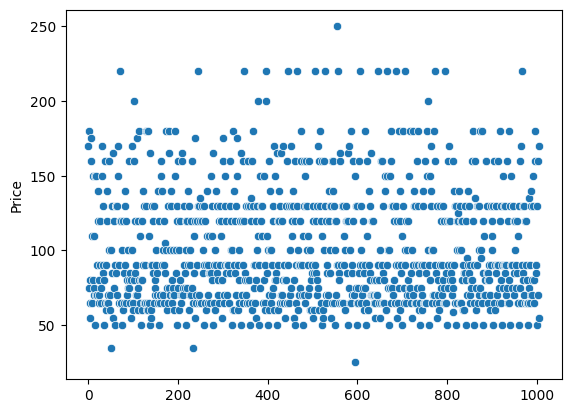

In [10]:
print(f'Min : {dataframe.Price.min()}')
print(f'Max : {dataframe.Price.max()}')
print(f'Median : {dataframe.Price.median()}')
print(f'Mean : {dataframe.Price.mean()}')
print(f'Std : {dataframe.Price.std()}')

sns.scatterplot(data=dataframe['Price'])

## Preprocessing

In [11]:
dataframe.head()

,Brand,Type,Gender,Size,Color,Price
0,Nike,Basketball,1,10.0,Red,170.0
1,Adidas,Running,1,9.5,Black,180.0
2,Reebok,Casual,1,11.0,White,75.0
3,Converse,Casual,0,8.0,Navy,55.0
4,Puma,Lifestyle,0,7.5,Pink,80.0


In [35]:
#Avec Preprocessing
labels = dataframe.columns
print(labels)

data = dataframe.copy()

leBrand = preprocessing.LabelEncoder()
leType = preprocessing.LabelEncoder()
leColor = preprocessing.LabelEncoder()

mmsSize = preprocessing.MinMaxScaler()
mmsPrice = preprocessing.MinMaxScaler()
mmsColor = preprocessing.MinMaxScaler()
mmsBrand = preprocessing.MinMaxScaler()
mmsType = preprocessing.MinMaxScaler()


data['Brand'] = leBrand.fit_transform(dataframe['Brand'])
data['Type'] = leType.fit_transform(dataframe['Type'])
data['Color'] = leColor.fit_transform(dataframe['Color'])
data['Size'] = mmsSize.fit_transform(data['Size'].values.reshape(-1, 1))
data['Price'] = mmsPrice.fit_transform(data['Price'].values.reshape(-1, 1))
data['Color'] = mmsColor.fit_transform(data['Color'].values.reshape(-1, 1))
data['Brand'] = mmsBrand.fit_transform(data['Brand'].values.reshape(-1, 1))
data['Type'] = mmsType.fit_transform(data['Type'].values.reshape(-1, 1))

labels = data['Gender']



data.head()



Index(['Brand', 'Type', 'Gender', 'Size', 'Color', 'Price'], dtype='object')


,Brand,Type,Gender,Size,Color,Price
0,0.555556,0.000000,1,0.666667,0.818182,0.644444
1,0.000000,0.588235,1,0.583333,0.030303,0.688889
2,0.777778,0.058824,1,0.833333,0.939394,0.222222
3,0.222222,0.058824,0,0.333333,0.696970,0.133333
4,0.666667,0.411765,0,0.250000,0.757576,0.244444


## Corellation

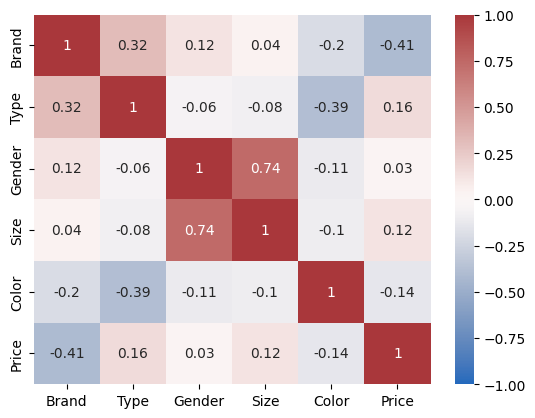

In [13]:
matrix = data.corr().round(2)

sns.heatmap(matrix, annot=True,  vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [36]:
data = data.drop(columns='Gender')

## Dimensionality reduction

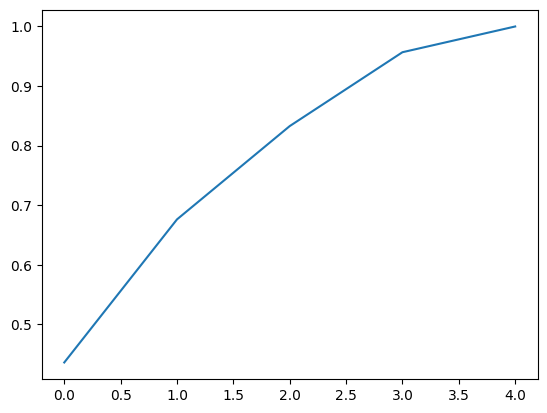

In [37]:
pca = PCA(n_components=5)
projected_data = pca.fit_transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [32]:

"""
dataframe['Brand'] = pd.Categorical(dataframe['Brand'])
dataframe['Brand'] = dataframe['Brand'].cat.codes
labels = dataframe['Brand']

data = dataframe.drop('Brand', axis=1)
pca = PCA(n_components=5)
#data['Model'] = pd.Categorical(data['Model'])
#data['Model'] = data['Model'].cat.codes
data['Type'] = pd.Categorical(data['Type'])
data['Type'] = data['Type'].cat.codes
data['Color'] = pd.Categorical(data['Color'])
data['Color'] = data['Color'].cat.codes
projected_data = pca.fit_transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
"""
print(labels)

0       0.000000
1       0.588235
2       0.058824
3       0.058824
4       0.411765
          ...   
1001    0.588235
1002    0.588235
1003    0.294118
1004    0.882353
1005    0.588235
Name: Type, Length: 1006, dtype: float64


(1006, 3)


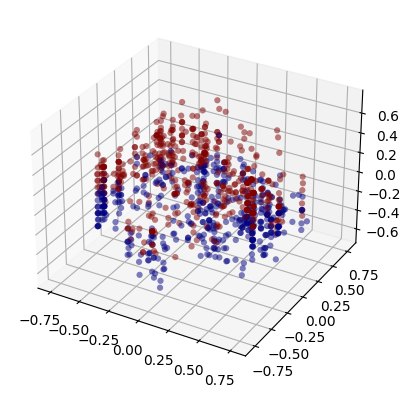

In [38]:
pca2 = PCA(n_components=3)
projected_data2 = pca2.fit_transform(data)

print(projected_data2.shape)

plt.figure()

ax = plt.axes(projection='3d')
ax.scatter(
    projected_data2[:, 0],
    projected_data2[:, 1],
    projected_data2[:, 2],
    c=labels,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("jet", 10)
)

# Clustering

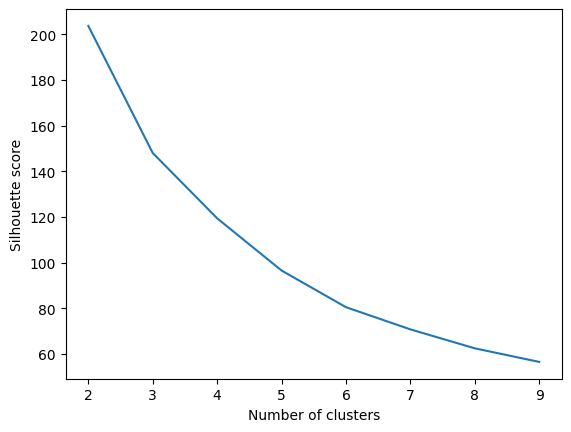

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettes = []
inertias = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    # y_means = kmeans.fit_predict(projected_data2)
    # silhouettes.append(silhouette_score(projected_data2, y_kmeans))
    kmeans.fit(projected_data2)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette score")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(projected_data2)
print("Centroids: ", kmeans.cluster_centers_)

Centroids:  [[ 0.31291392  0.29160939 -0.30441512]
 [-0.40934513  0.15295493  0.05466607]
 [ 0.43043774 -0.19240594  0.30267632]
 [-0.09510457 -0.55242419 -0.20148974]
 [-0.18156419  0.55191664 -0.06909643]
 [-0.62569683 -0.23306684 -0.04344693]
 [ 0.5651829  -0.01507001 -0.01493721]
 [-0.27851694  0.14591556  0.42593207]
 [ 0.07830104 -0.09870229 -0.12234736]]


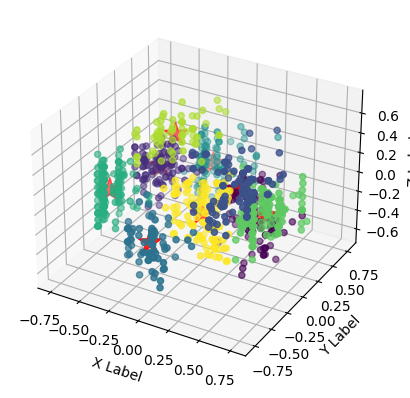

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(projected_data2[:, 0], projected_data2[:, 1], projected_data2[:, 2], c=y_kmeans, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='*', s=300, c='red')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78fee1a8-8fdd-4237-ba69-e565ec384717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>